# Assignment 6E [KNN Algorithm]

* Problem: 
    A healthcare facility (aka hospital) brought in a new research physician who specializes in treating burn victims. This physician has been tasked with running the hospital’s telemedicine division and is interested in using machine learning to triage patients who schedule appointments with the telemedicine service.  As part of the triage process, patients are instructed to send in photographs of their skin, so that the most in-need patients can be treated first. Naturally, a patient who has received a recent burn would be treated first (a "true positive": the patient’s assessment matches with medical facility requirements, see confusion matrix), whereas patients who have lower-level injuries or conditions (such as photodermatitis or eczema) would be triaged away to a different ward (a "false positive": the patient’s assessment is not what hospital thinks). 



* Solution: 
    You are hired to classify the patients, based on their photographs, as "burn" or "not burn". Run the KNN algorithm and produce a confusion matrix – a standard tool in data science to assess goodness of a fit (i.e., quantifying how well an algorithm performs on test data).



* In this assignment, you will write KNN based image classification program in python and recommend best value for K that produces highest accuracy. This assignment involves using the entire dataset for calculating optimal K value. For this part, you can try different K values and test its accuracy using one or more of the metrics such as accuracy, confusion matrix, recall, and precision. 


#### Unzipping the Images Data

In [80]:
#unzipping the data

import zipfile
with zipfile.ZipFile('/Users/ravivarmakumarbevara/Desktop/Ph.D./CSCE_5300/BurnImages.zip', 'r') as zip_ref:
    zip_ref.extractall('/Users/ravivarmakumarbevara/Desktop/Ph.D./CSCE_5300/')

#### Importing the Modules

In [81]:
#importing the modules

import numpy as np
import random
from PIL import Image
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [82]:
#reading data

mypath = '/Users/ravivarmakumarbevara/Desktop/Ph.D./CSCE_5300/BurnImages'
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

x = []
y = []

for file in files:
    if file == '.DS_Store':
        continue
    elif 'i' == file[0]:
        y.append('burn')
        img = np.array(Image.open(mypath + '/' +file)).mean(axis=(0,1))
        x.append((img[0]/(img[0]+img[1]+img[2]),img[1]/(img[0]+img[1]+img[2]),(img[2]/img[0]+img[1]+img[2])))
    else:
        y.append('notburn')
        img = np.array(Image.open(mypath + '/' +file)).mean(axis=(0,1))
        x.append((img[0]/(img[0]+img[1]+img[2]),img[1]/(img[0]+img[1]+img[2]),(img[2]/img[0]+img[1]+img[2])))
x = np.array(x)

#### Best Parameters for Logistic Regression

In [83]:
import warnings
from sklearn.model_selection import GridSearchCV 
warnings.filterwarnings('ignore')

parameters = {'penalty': ['l1','l2'], 
              'C': np.logspace(-3,3,7), 
              'solver': ['newton-cg', 'lbfgs', 'liblinear']}
logreg = LogisticRegression(max_iter=10000,n_jobs=-1)
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)
clf.fit(x,y)
print("Tuned Hyperparameters :", clf.best_params_)

Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}


## 75/25

In [84]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [85]:
#model training
logisticregressionmodel = LogisticRegression(solver='newton-cg',max_iter=10000,C=0.001,penalty='l2')
logisticregressionmodel.fit(x_train, y_train)

LogisticRegression(C=0.001, max_iter=10000, solver='newton-cg')

In [86]:
#predictions test
predicted_y = logisticregressionmodel.predict(x_test)

In [87]:
#metric1 - accuracy score
logisticregressionmodel.score(x_test,y_test)

0.9090909090909091

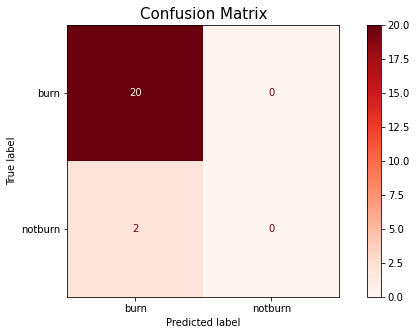

In [88]:
#metric2 - confusion matrix
model1confusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = logisticregressionmodel.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=model1confusionmatrix,display_labels=logisticregressionmodel.classes_)
fig, ax = plt.subplots(figsize=(10,5))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [89]:
#metric4 - classification report
model1report = metrics.classification_report(y_test,predicted_y)
print(model1report)

              precision    recall  f1-score   support

        burn       0.91      1.00      0.95        20
     notburn       0.00      0.00      0.00         2

    accuracy                           0.91        22
   macro avg       0.45      0.50      0.48        22
weighted avg       0.83      0.91      0.87        22



In [90]:
# encoding the labels to 0,1 to calculate roc,  auc curve

enc = LabelEncoder()
enc.fit(y_test)
y_test = enc.transform(y_test)

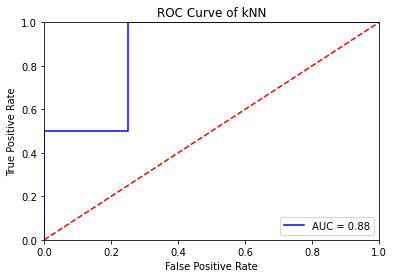

In [91]:
#metric4 - roc, auc curve
y_scores=logisticregressionmodel.predict_proba(x_test)

fpr,tpr,threshold =metrics.roc_curve(y_test,y_scores[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## 70/30

In [100]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [101]:
#model training
logisticregressionmodel = LogisticRegression(solver='newton-cg',max_iter=10000,C=0.001,penalty='l2')
logisticregressionmodel.fit(x_train, y_train)

LogisticRegression(C=0.001, max_iter=10000, solver='newton-cg')

In [102]:
#predictions test
predicted_y = logisticregressionmodel.predict(x_test)

In [103]:
#metric1 - accuracy score
logisticregressionmodel.score(x_test,y_test)

0.8888888888888888

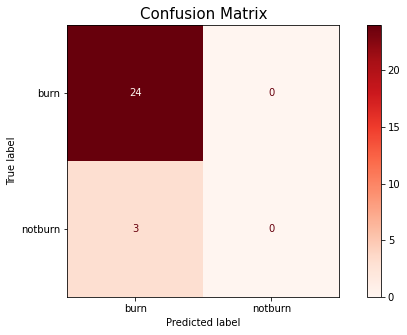

In [104]:
#metric2 - confusion matrix
model1confusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = logisticregressionmodel.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=model1confusionmatrix,display_labels=logisticregressionmodel.classes_)
fig, ax = plt.subplots(figsize=(10,5))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [105]:
modelreport = metrics.classification_report(y_test,predicted_y)
print(model1report)

              precision    recall  f1-score   support

        burn       0.91      1.00      0.95        20
     notburn       0.00      0.00      0.00         2

    accuracy                           0.91        22
   macro avg       0.45      0.50      0.48        22
weighted avg       0.83      0.91      0.87        22



In [106]:
# encoding the labels to 0,1 to calculate roc,  auc curve

enc = LabelEncoder()
enc.fit(y_test)
y_test = enc.transform(y_test)

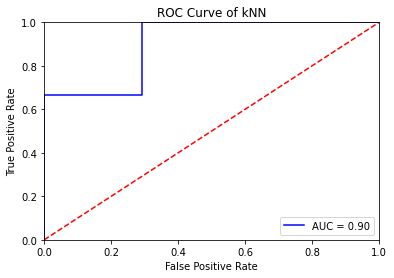

In [107]:
#metric4 - roc, auc curve
y_scores=logisticregressionmodel.predict_proba(x_test)

fpr,tpr,threshold =metrics.roc_curve(y_test,y_scores[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## 80/20

In [108]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [109]:
#model training
logisticregressionmodel = LogisticRegression(solver='newton-cg',max_iter=10000,C=0.001,penalty='l2')
logisticregressionmodel.fit(x_train, y_train)

LogisticRegression(C=0.001, max_iter=10000, solver='newton-cg')

In [110]:
#predictions test
predicted_y = logisticregressionmodel.predict(x_test)

In [111]:
#metric1 - accuracy score
logisticregressionmodel.score(x_test,y_test)

0.8888888888888888

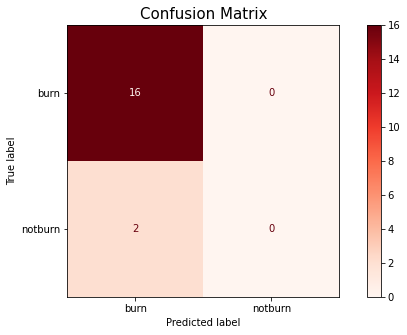

In [112]:
#metric2 - confusion matrix
model1confusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = logisticregressionmodel.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=model1confusionmatrix,display_labels=logisticregressionmodel.classes_)
fig, ax = plt.subplots(figsize=(10,5))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [113]:
#metric4 - classification report
model1report = metrics.classification_report(y_test,predicted_y)
print(model1report)

              precision    recall  f1-score   support

        burn       0.89      1.00      0.94        16
     notburn       0.00      0.00      0.00         2

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18



In [114]:
# encoding the labels to 0,1 to calculate roc,  auc curve

enc = LabelEncoder()
enc.fit(y_test)
y_test = enc.transform(y_test)

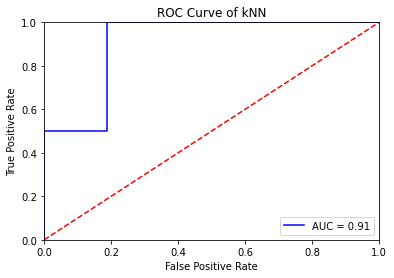

In [115]:
#metric4 - roc, auc curve
y_scores=logisticregressionmodel.predict_proba(x_test)

fpr,tpr,threshold =metrics.roc_curve(y_test,y_scores[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## 85/15

In [116]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [117]:
#model training
logisticregressionmodel = LogisticRegression(solver='newton-cg',max_iter=10000,C=0.001,penalty='l2')
logisticregressionmodel.fit(x_train, y_train)

LogisticRegression(C=0.001, max_iter=10000, solver='newton-cg')

In [118]:
#predictions test
predicted_y = logisticregressionmodel.predict(x_test)

In [119]:
#metric1 - accuracy score
logisticregressionmodel.score(x_test,y_test)

0.8571428571428571

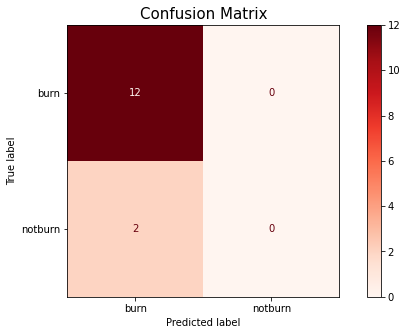

In [120]:
#metric2 - confusion matrix
model1confusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = logisticregressionmodel.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=model1confusionmatrix,display_labels=logisticregressionmodel.classes_)
fig, ax = plt.subplots(figsize=(10,5))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [121]:
#metric4 - classification report
model1report = metrics.classification_report(y_test,predicted_y)
print(model1report)

              precision    recall  f1-score   support

        burn       0.86      1.00      0.92        12
     notburn       0.00      0.00      0.00         2

    accuracy                           0.86        14
   macro avg       0.43      0.50      0.46        14
weighted avg       0.73      0.86      0.79        14



In [122]:
# encoding the labels to 0,1 to calculate roc,  auc curve

enc = LabelEncoder()
enc.fit(y_test)
y_test = enc.transform(y_test)

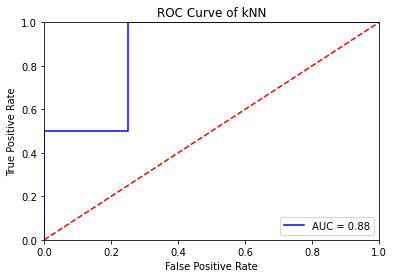

In [123]:
#metric4 - roc, auc curve
y_scores=logisticregressionmodel.predict_proba(x_test)

fpr,tpr,threshold =metrics.roc_curve(y_test,y_scores[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## 65/35

In [124]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [125]:
#model training
logisticregressionmodel = LogisticRegression(solver='newton-cg',max_iter=10000,C=0.001,penalty='l2')
logisticregressionmodel.fit(x_train, y_train)

LogisticRegression(C=0.001, max_iter=10000, solver='newton-cg')

In [126]:
#predictions test
predicted_y = logisticregressionmodel.predict(x_test)

In [127]:
#metric1 - accuracy score
logisticregressionmodel.score(x_test,y_test)

0.9032258064516129

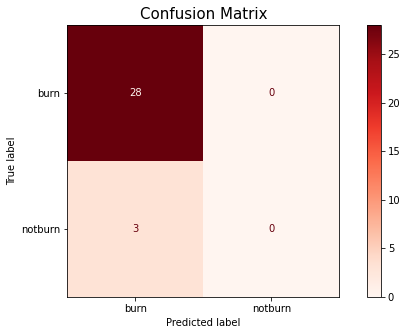

In [128]:
#metric2 - confusion matrix
model1confusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = logisticregressionmodel.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=model1confusionmatrix,display_labels=logisticregressionmodel.classes_)
fig, ax = plt.subplots(figsize=(10,5))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [129]:
#metric4 - classification report
model1report = metrics.classification_report(y_test,predicted_y)
print(model1report)

              precision    recall  f1-score   support

        burn       0.90      1.00      0.95        28
     notburn       0.00      0.00      0.00         3

    accuracy                           0.90        31
   macro avg       0.45      0.50      0.47        31
weighted avg       0.82      0.90      0.86        31



In [130]:
# encoding the labels to 0,1 to calculate roc,  auc curve

enc = LabelEncoder()
enc.fit(y_test)
y_test = enc.transform(y_test)

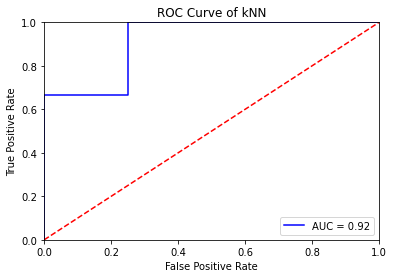

In [131]:
#metric4 - roc, auc curve
y_scores=logisticregressionmodel.predict_proba(x_test)

fpr,tpr,threshold =metrics.roc_curve(y_test,y_scores[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## 60/40

In [132]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

In [133]:
#model training
logisticregressionmodel = LogisticRegression(solver='newton-cg',max_iter=10000,C=0.001,penalty='l2')
logisticregressionmodel.fit(x_train, y_train)

LogisticRegression(C=0.001, max_iter=10000, solver='newton-cg')

In [134]:
#predictions test
predicted_y = logisticregressionmodel.predict(x_test)

In [135]:
#metric1 - accuracy score
logisticregressionmodel.score(x_test,y_test)

0.9166666666666666

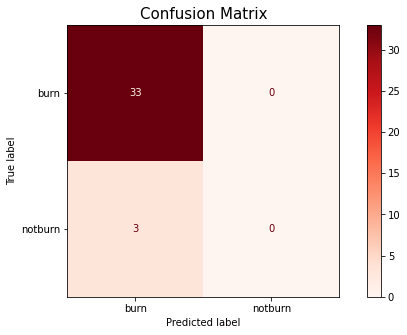

In [136]:
#metric2 - confusion matrix
model1confusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = logisticregressionmodel.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=model1confusionmatrix,display_labels=logisticregressionmodel.classes_)
fig, ax = plt.subplots(figsize=(10,5))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [137]:
#metric4 - classification report
model1report = metrics.classification_report(y_test,predicted_y)
print(model1report)

              precision    recall  f1-score   support

        burn       0.92      1.00      0.96        33
     notburn       0.00      0.00      0.00         3

    accuracy                           0.92        36
   macro avg       0.46      0.50      0.48        36
weighted avg       0.84      0.92      0.88        36



In [138]:
# encoding the labels to 0,1 to calculate roc,  auc curve

enc = LabelEncoder()
enc.fit(y_test)
y_test = enc.transform(y_test)

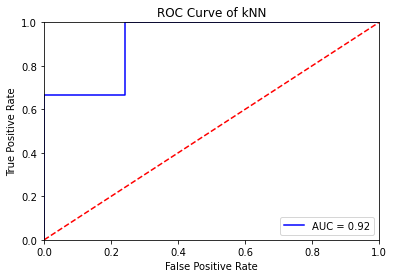

In [139]:
#metric4 - roc, auc curve
y_scores=logisticregressionmodel.predict_proba(x_test)

fpr,tpr,threshold =metrics.roc_curve(y_test,y_scores[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## 55/45

In [140]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=42)

In [141]:
#model training
logisticregressionmodel = LogisticRegression(solver='newton-cg',max_iter=10000,C=0.001,penalty='l2')
logisticregressionmodel.fit(x_train, y_train)

LogisticRegression(C=0.001, max_iter=10000, solver='newton-cg')

In [142]:
#predictions test
predicted_y = logisticregressionmodel.predict(x_test)

In [143]:
#metric1 - accuracy score
logisticregressionmodel.score(x_test,y_test)

0.95

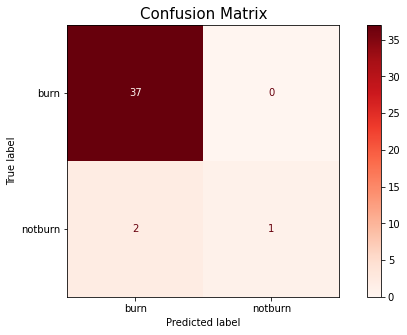

In [144]:
#metric2 - confusion matrix
model1confusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = logisticregressionmodel.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=model1confusionmatrix,display_labels=logisticregressionmodel.classes_)
fig, ax = plt.subplots(figsize=(10,5))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [145]:
#metric4 - classification report
model1report = metrics.classification_report(y_test,predicted_y)
print(model1report)

              precision    recall  f1-score   support

        burn       0.95      1.00      0.97        37
     notburn       1.00      0.33      0.50         3

    accuracy                           0.95        40
   macro avg       0.97      0.67      0.74        40
weighted avg       0.95      0.95      0.94        40



In [146]:
# encoding the labels to 0,1 to calculate roc,  auc curve

enc = LabelEncoder()
enc.fit(y_test)
y_test = enc.transform(y_test)

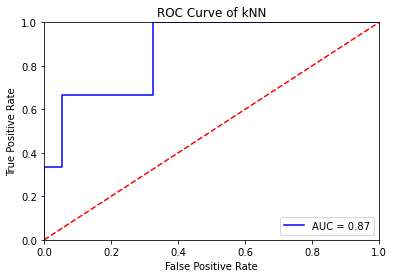

In [147]:
#metric4 - roc, auc curve
y_scores=logisticregressionmodel.predict_proba(x_test)

fpr,tpr,threshold =metrics.roc_curve(y_test,y_scores[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## 50/50

In [156]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)

In [149]:
#model training
logisticregressionmodel = LogisticRegression(solver='newton-cg',max_iter=10000,C=0.001,penalty='l2')
logisticregressionmodel.fit(x_train, y_train)

LogisticRegression(C=0.001, max_iter=10000, solver='newton-cg')

In [150]:
#predictions test
predicted_y = logisticregressionmodel.predict(x_test)

In [151]:
#metric1 - accuracy score
logisticregressionmodel.score(x_test,y_test)

0.9545454545454546

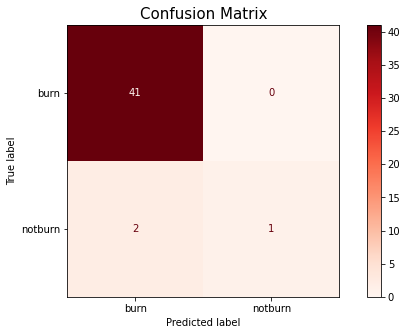

In [152]:
#metric2 - confusion matrix
model1confusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = logisticregressionmodel.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=model1confusionmatrix,display_labels=logisticregressionmodel.classes_)
fig, ax = plt.subplots(figsize=(10,5))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [153]:
#metric4 - classification report
model1report = metrics.classification_report(y_test,predicted_y)
print(model1report)

              precision    recall  f1-score   support

        burn       0.95      1.00      0.98        41
     notburn       1.00      0.33      0.50         3

    accuracy                           0.95        44
   macro avg       0.98      0.67      0.74        44
weighted avg       0.96      0.95      0.94        44



In [154]:
# encoding the labels to 0,1 to calculate roc,  auc curve

enc = LabelEncoder()
enc.fit(y_test)
y_test = enc.transform(y_test)

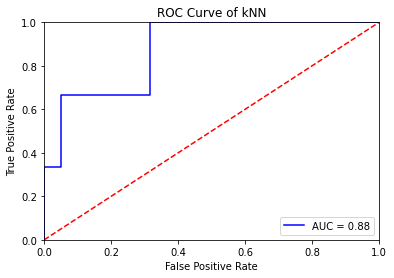

In [155]:
#metric4 - roc, auc curve
y_scores=logisticregressionmodel.predict_proba(x_test)

fpr,tpr,threshold =metrics.roc_curve(y_test,y_scores[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

#### So, we can see that improving accuracy for decrease in train data. I would consider 50/50 split and build a knn model

## k = 1

#### Model Training 

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

In [64]:
# training the model

model = KNeighborsClassifier(n_neighbors=1).fit(x_train,y_train)
model

KNeighborsClassifier(n_neighbors=1)

In [65]:
#predictions test

predicted_y = model.predict(x_test)
predicted_y

array(['burn', 'burn', 'burn', 'burn', 'burn', 'burn', 'burn', 'burn',
       'burn', 'burn', 'burn', 'burn', 'burn', 'burn', 'burn', 'burn',
       'burn', 'burn', 'burn', 'burn', 'burn', 'burn', 'burn', 'burn',
       'burn', 'burn', 'burn', 'burn', 'burn', 'burn', 'burn', 'burn',
       'burn', 'burn', 'burn', 'burn'], dtype='<U7')

#### Metrics

In [66]:
#metric1 - accuracy score

model.score(x_test,y_test)

0.9166666666666666

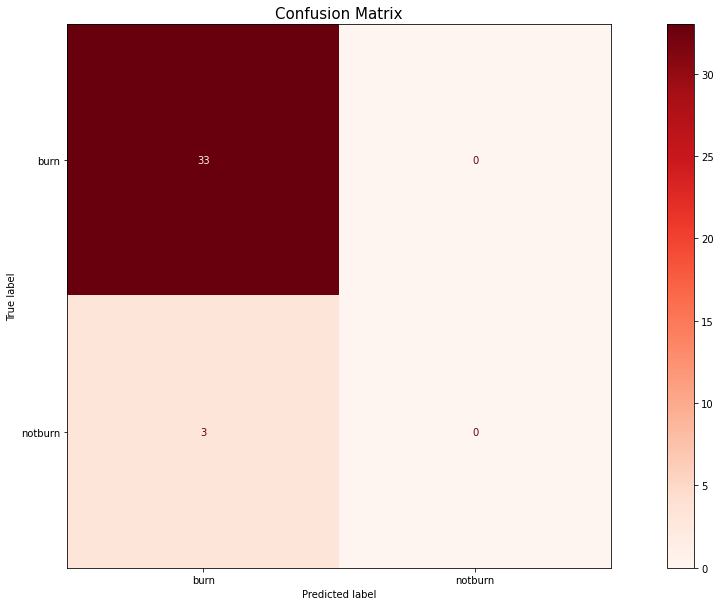

In [67]:
#metric2 - confusion matrix

modelconfusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = model.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=modelconfusionmatrix,display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(20,10))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [68]:
#metric3 - classification report

modelreport = metrics.classification_report(y_test,predicted_y)
print(modelreport)

              precision    recall  f1-score   support

        burn       0.92      1.00      0.96        33
     notburn       0.00      0.00      0.00         3

    accuracy                           0.92        36
   macro avg       0.46      0.50      0.48        36
weighted avg       0.84      0.92      0.88        36



In [69]:
# encoding the labels to 0,1 to calculate roc,  auc curve

enc = LabelEncoder()
enc.fit(y_test)
y_test = enc.transform(y_test)

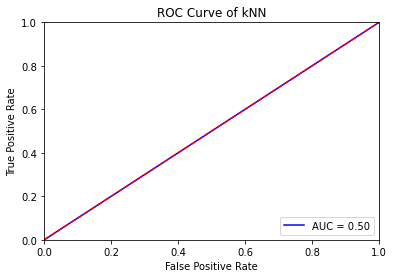

In [70]:
#metric4 - roc, auc curve
y_scores=model.predict_proba(x_test)

fpr,tpr,threshold =metrics.roc_curve(y_test,y_scores[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## k = 3

In [ ]:
# training the model

model = KNeighborsClassifier(n_neighbors=3).fit(x,y)
model

In [ ]:
#testing the model

testdata = random.sample(files,20)
test_x = []
test_y = []

for file in testdata:
    if file == '.DS_Store':
        continue
    elif 'i' == file[0]:
        test_y.append('burn')
        img = np.array(Image.open(mypath + '/' +file)).mean(axis=(0,1))
        test_x.append((img[0]/(img[0]+img[1]+img[2]),img[1]/(img[0]+img[1]+img[2]),(img[2]/img[0]+img[1]+img[2])))
    else:
        test_y.append('notburn')
        img = np.array(Image.open(mypath + '/' +file)).mean(axis=(0,1))
        test_x.append((img[0]/(img[0]+img[1]+img[2]),img[1]/(img[0]+img[1]+img[2]),(img[2]/img[0]+img[1]+img[2])))
test_x = np.array(test_x)

In [ ]:
#predictions test

predicted_y = model.predict(test_x)
predicted_y

In [ ]:
#metric1 - accuracy score

model.score(test_x,test_y)

In [ ]:
#metric2 - confusion matrix

modelconfusionmatrix = metrics.confusion_matrix(test_y, predicted_y, labels = model.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=modelconfusionmatrix,display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(20,10))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [ ]:
#metric3 - classification report

modelreport = metrics.classification_report(test_y,predicted_y)
print(modelreport)

In [ ]:
# encoding the labels to 0,1

enc = LabelEncoder()
enc.fit(test_y)
y_test = enc.transform(test_y)

In [ ]:
#metric4 - roc, auc curve
y_scores=model.predict_proba(test_x)

fpr,tpr,threshold =metrics.roc_curve(y_test,y_scores[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## k = 5

In [ ]:
# training the model

model = KNeighborsClassifier(n_neighbors=5).fit(x,y)
model

In [ ]:
#testing the model

testdata = random.sample(files,20)
test_x = []
test_y = []

for file in testdata:
    if file == '.DS_Store':
        continue
    elif 'i' == file[0]:
        test_y.append('burn')
        img = np.array(Image.open(mypath + '/' +file)).mean(axis=(0,1))
        test_x.append((img[0]/(img[0]+img[1]+img[2]),img[1]/(img[0]+img[1]+img[2]),(img[2]/img[0]+img[1]+img[2])))
    else:
        test_y.append('notburn')
        img = np.array(Image.open(mypath + '/' +file)).mean(axis=(0,1))
        test_x.append((img[0]/(img[0]+img[1]+img[2]),img[1]/(img[0]+img[1]+img[2]),(img[2]/img[0]+img[1]+img[2])))
test_x = np.array(test_x)

In [ ]:
#predictions test

predicted_y = model.predict(test_x)
predicted_y

In [ ]:
#metric1 - accuracy score

model.score(test_x,test_y)

In [ ]:
#metric2 - confusion matrix

modelconfusionmatrix = metrics.confusion_matrix(test_y, predicted_y, labels = model.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=modelconfusionmatrix,display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(20,10))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [ ]:
#metric3 - classification report

modelreport = metrics.classification_report(test_y,predicted_y)
print(modelreport)

In [ ]:
# encoding the labels to 0,1

enc = LabelEncoder()
enc.fit(test_y)
y_test = enc.transform(test_y)

In [ ]:
#metric4 - roc, auc curve
y_scores=model.predict_proba(test_x)

fpr,tpr,threshold =metrics.roc_curve(y_test,y_scores[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

#### Finding Best Accuracy K-Value

In [ ]:
scores = []

for i in range(1,30):
    model = KNeighborsClassifier(i)
    model.fit(x,y)
    pred_y = model.predict(test_x)
    score = metrics.accuracy_score(test_y,pred_y,normalize=True)*float(100)
    scores.append(score)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),scores,marker='*',markersize=10,markerfacecolor='cyan')
plt.ylabel('Accuracy of the Model')
plt.xlabel('K-Value')
plt.show()

#### Cross Validation for Optimal K-Value

In [ ]:
from sklearn.model_selection import cross_val_score

optimal_kvalues = list(range(1,15,3))
cvScores = []

for i in optimal_kvalues:
    model = KNeighborsClassifier(i)
    scores = cross_val_score(model,x,y,cv=8,scoring='accuracy')
    cvScores.append(scores.mean())

error = [1-x for x in cvScores]

plt.figure(figsize=(10,6))
plt.plot(range(1,15,3),error,marker='*',markersize=10,markerfacecolor='red')
plt.xlabel('K-Value')
plt.ylabel('Missclassification error')
plt.show()

## k = 7

In [ ]:
# training the model

model = KNeighborsClassifier(n_neighbors=7).fit(x,y)
model

In [ ]:
#testing the model

testdata = random.sample(files,20)
test_x = []
test_y = []

for file in testdata:
    if file == '.DS_Store':
        continue
    elif 'i' == file[0]:
        test_y.append('burn')
        img = np.array(Image.open(mypath + '/' +file)).mean(axis=(0,1))
        test_x.append((img[0]/(img[0]+img[1]+img[2]),img[1]/(img[0]+img[1]+img[2]),(img[2]/img[0]+img[1]+img[2])))
    else:
        test_y.append('notburn')
        img = np.array(Image.open(mypath + '/' +file)).mean(axis=(0,1))
        test_x.append((img[0]/(img[0]+img[1]+img[2]),img[1]/(img[0]+img[1]+img[2]),(img[2]/img[0]+img[1]+img[2])))
test_x = np.array(test_x)

In [ ]:
#predictions test

predicted_y = model.predict(test_x)
predicted_y

In [ ]:
#metric1 - accuracy score

model.score(test_x,test_y)

In [ ]:
#metric2 - confusion matrix

modelconfusionmatrix = metrics.confusion_matrix(test_y, predicted_y, labels = model.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=modelconfusionmatrix,display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(20,10))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [ ]:
#metric3 - classification report

modelreport = metrics.classification_report(test_y,predicted_y)
print(modelreport)

In [ ]:
# encoding the labels to 0,1

enc = LabelEncoder()
enc.fit(test_y)
y_test = enc.transform(test_y)

In [ ]:
#metric4 - roc, auc curve
y_scores=model.predict_proba(test_x)

fpr,tpr,threshold =metrics.roc_curve(y_test,y_scores[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

#### So, k=7 is the optimal choice as it is achieving better accuracy along with best misclassification rate.